**Forêts aléatoires**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [3]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.90)

In [8]:
# train
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
# test
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9048207663782447


**Question**

In [9]:
# Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même nombre d’arbres (200 dans notre cas) ?
# :: réponse :: 
#on compare le résultat  de l’algorithme des forêts aléatoires avec celle du cas bagging, notre accuracy augmente plus ( 89% -> 91%%)
#, ce qui logique puisque l'algomètre  optimise les arbres de décision par la randomisation dans la sélection des attributs

on compare le résultat  de l’algorithme des forêts aléatoires avec celle du cas bagging, notre accuracy augmente plus ( 89% -> 91%%), ce qui logique puisque l'algomètre  optimise les arbres de décision par la randomisation dans la sélection des attributs

**Question**

In [15]:
# Construire la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.
list_accuracy = []
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = RandomForestClassifier(n_estimators=200)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    list_accuracy.append(accuracy)


In [16]:
print(f"la moyenne d'accuracy pour les 100 tirages {np.mean(list_accuracy)}")
print(f"la variance d'accuracy pour les 100 tirages {np.std(list_accuracy)}")

la moyenne d'accuracy pour les 100 tirages 0.9120828182941904
la variance d'accuracy pour les 100 tirages 0.01307585693190605


In [17]:
# Que pouvons-nous conclure en comparant avec la séction précedente (bagging) ?
# on trouve presque la même variance 0.013 (0.014) un erreur de 1% 

**Question :**

In [18]:
plt.figure()
n_estm = []
n_accuracy = []
for i in range(1,200,5):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    n_estm.append(i)
    n_accuracy.append(accuracy)

<Figure size 432x288 with 0 Axes>

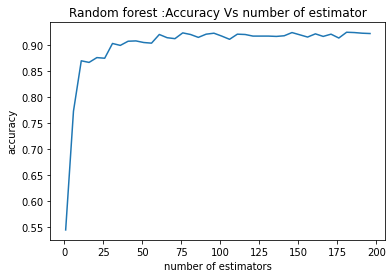

In [19]:
plt.figure()
plt.plot(n_estm,n_accuracy)
plt.xlabel('number of estimators')
plt.ylabel('accuracy')
plt.title('Random forest :Accuracy Vs number of estimator')
plt.show()

In [20]:
#Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?
#on constate qu'à partir de nombres d'arbres 30 on à une accuracy qui est presque maximal et stable , et on améliore plus à partir du 50 ( convergence rapide)

**Question :**

In [23]:
# Regardez dans la documentation les ExtraTreesClassifier et refaites la classification avec ce type de classifieur. Comparez avec RandomForestClassifier
# train
clf = ExtraTreesClassifier(n_estimators=200)
clf.fit(X_train, y_train)
# test
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9351050679851669


In [24]:
# notre accuracy s'améliore plus de 90% pour les random forest à 93% pour le classifieur ExtraTrees

notre accuracy s'améliore plus de 90% pour les random forest à 93% pour le classifieur ExtraTrees

**Boosting**

In [28]:
# Adaboost : Boosting model -> évaluer les classifieurs faibles  sur plusieurs versions légèrement modifiées des données d’apprentissage
#                              + modèle final :  combinées par une somme pondérée les résultats
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9122373300370828


In [35]:
# Question :

# test pour Le paramètre max_depth
accuracy_dict = {}
for i in range(1,20):
  clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i),n_estimators=200, learning_rate=2)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  accuracy_dict[i] = accuracy
accuracy_dict
# impact


{1: 0.7441285537700866,
 2: 0.788627935723115,
 3: 0.8355995055624228,
 4: 0.8788627935723115,
 5: 0.9134734239802225,
 6: 0.9184177997527813,
 7: 0.9239802224969098,
 8: 0.9283065512978986,
 9: 0.9196538936959209,
 10: 0.6847960444993819,
 11: 0.6489493201483313,
 12: 0.6594561186650185,
 13: 0.6606922126081582,
 14: 0.6563658838071693,
 15: 0.6353522867737948,
 16: 0.6569839307787392,
 17: 0.6606922126081582,
 18: 0.642150803461063,
 19: 0.6681087762669963}

In [43]:

# Question :

# test pour Le paramètre learning_rate
accuracy_dict = {}
for i in range(1,10):
  clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),n_estimators=200, learning_rate=i)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  accuracy_dict[i] = accuracy
accuracy_dict

# impact

{1: 0.8881334981458591,
 2: 0.9091470951792336,
 3: 0.8887515451174289,
 4: 0.8819530284301607,
 5: 0.842398022249691,
 6: 0.8244746600741656,
 7: 0.8405438813349815,
 8: 0.73053152039555,
 9: 0.6681087762669963}